In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
df=pd.read_csv("/content/lung_cancer_examples (1).csv")

In [5]:
df

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


In [7]:
df.shape

(59, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [9]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [12]:
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])
if 'Label' in df.columns:
    df = df.drop(columns=['Label'])

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['Name', 'Surname']))

In [17]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
print("Estimated bandwidth:", bandwidth)


Estimated bandwidth: 1.6342632213989818


In [18]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters = len(np.unique(labels))
print("Number of clusters found:", n_clusters)

Number of clusters found: 2


In [19]:
df['cluster'] = labels

In [20]:
try:
    sil = silhouette_score(X, labels)
    print("Silhouette Score:", sil)
except Exception as e:
    print("Silhouette score could not be computed:", e)

Silhouette Score: 0.4817628759313895


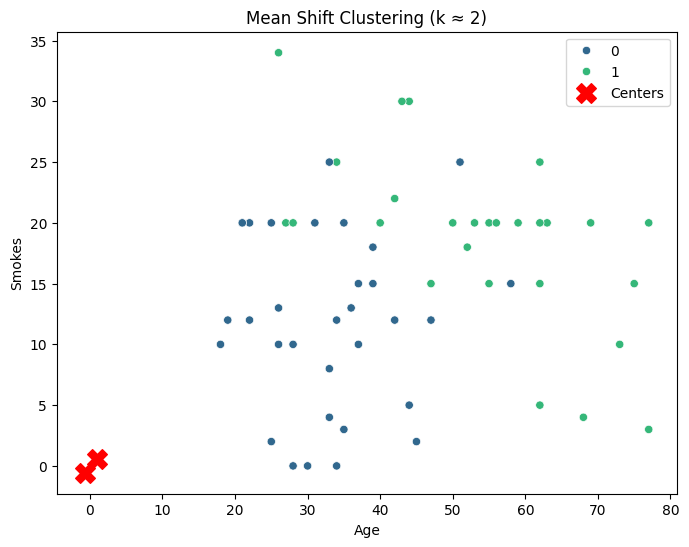

In [22]:
feat1 = 'Age'
feat2 = 'Smokes'
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=feat1, y=feat2, hue='cluster', palette='viridis', legend='full')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c='red', marker='X', s=200, label='Centers')
plt.title(f'Mean Shift Clustering (k ≈ {n_clusters})')
plt.legend()
plt.show()

In [23]:
df.to_csv('dataset_with_clusters.csv', index=False)
from google.colab import files
files.download('dataset_with_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>